SET DI DATI PARI

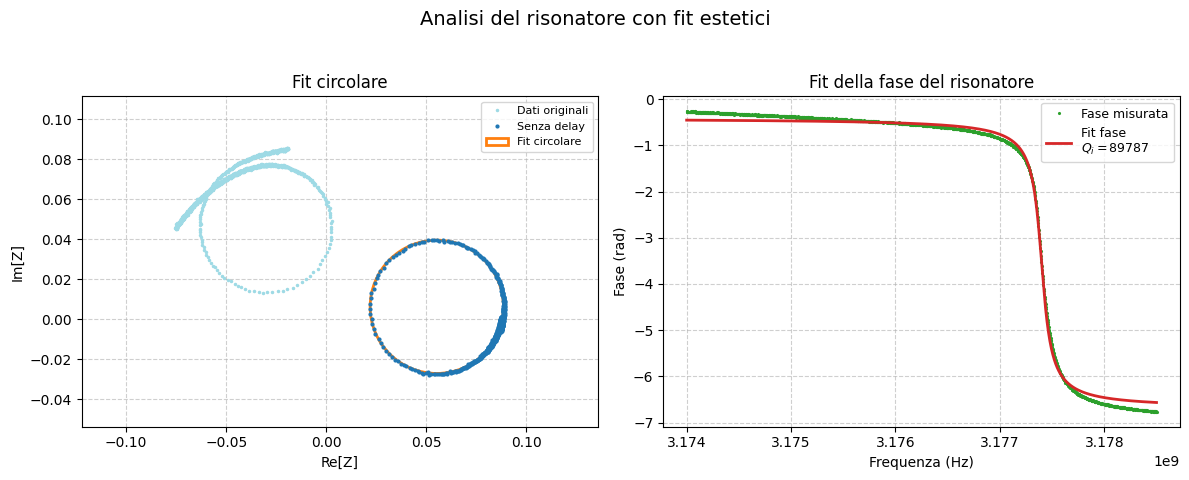

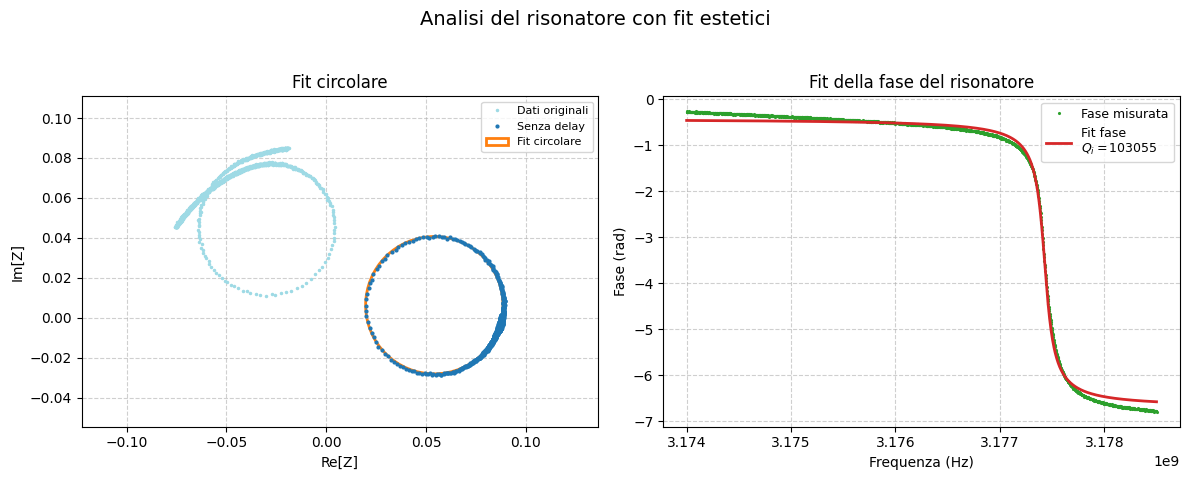

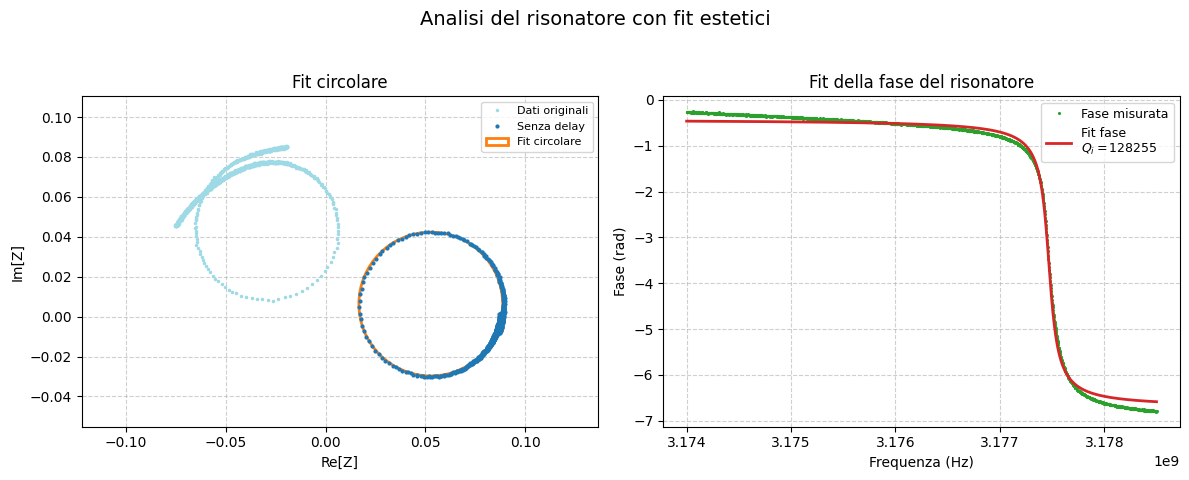

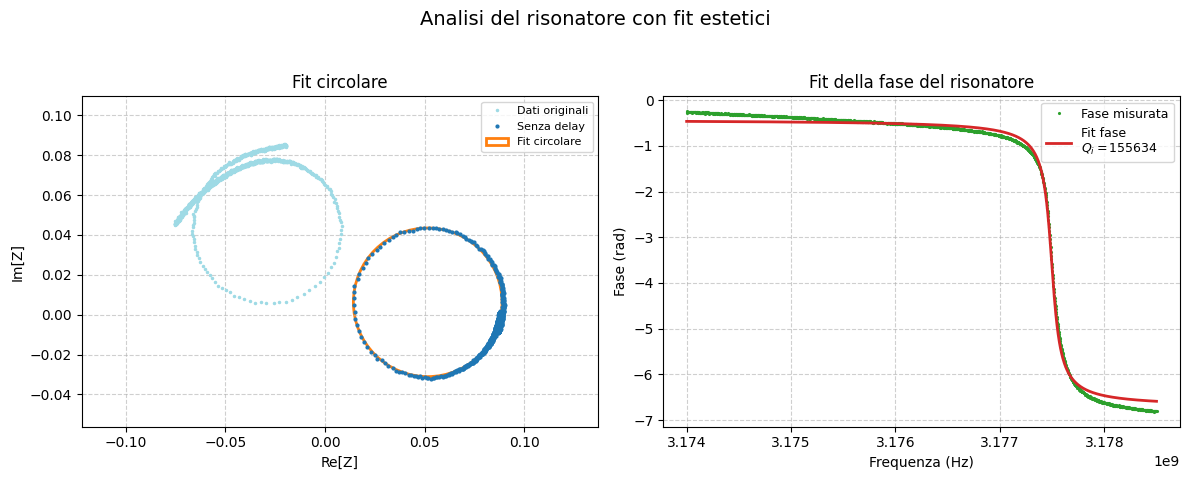

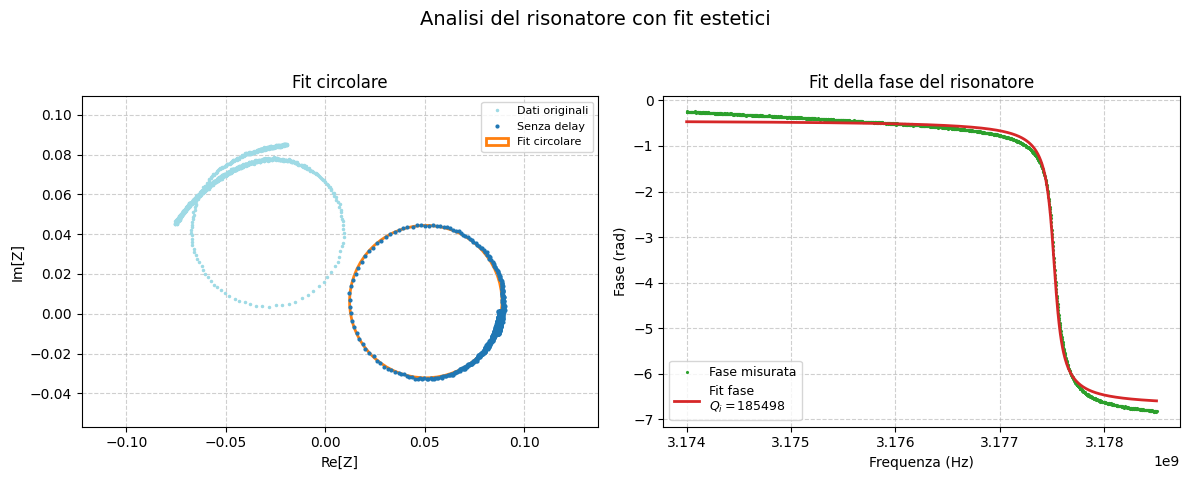

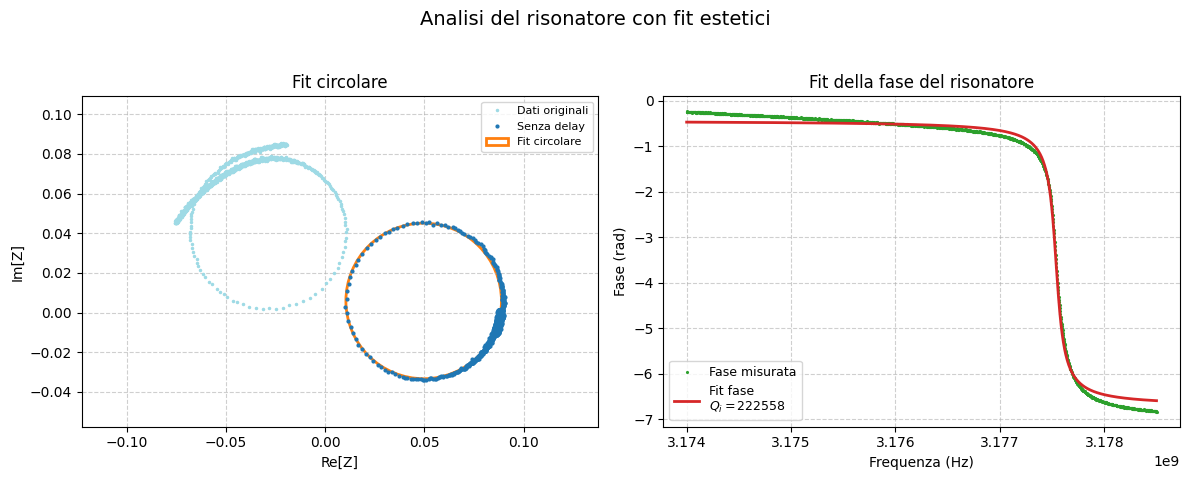

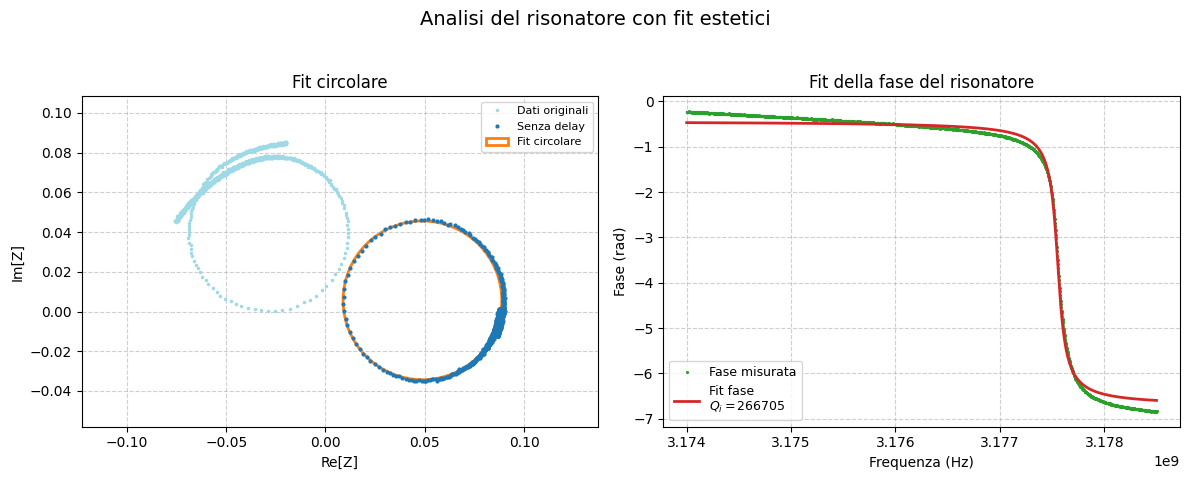

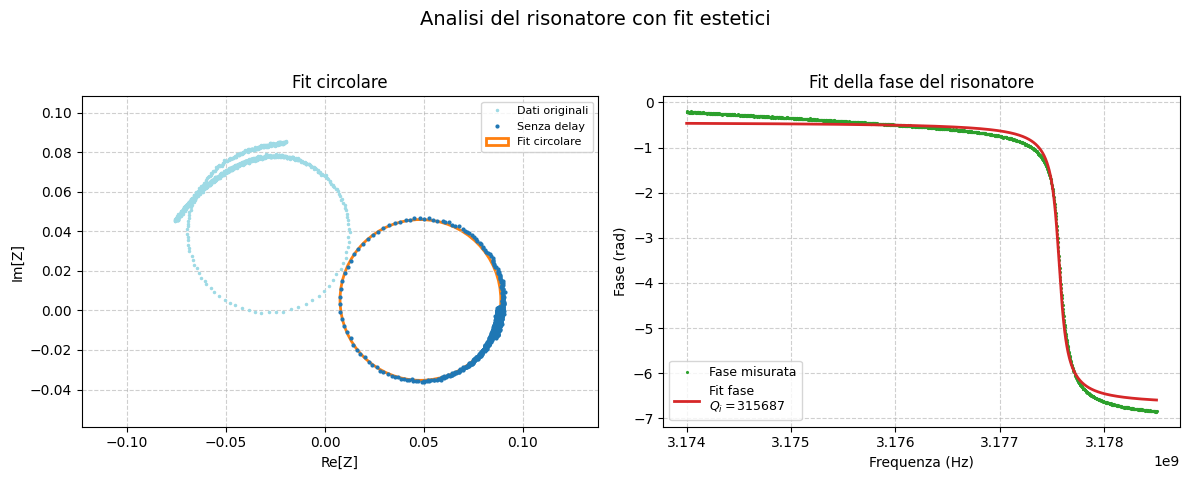

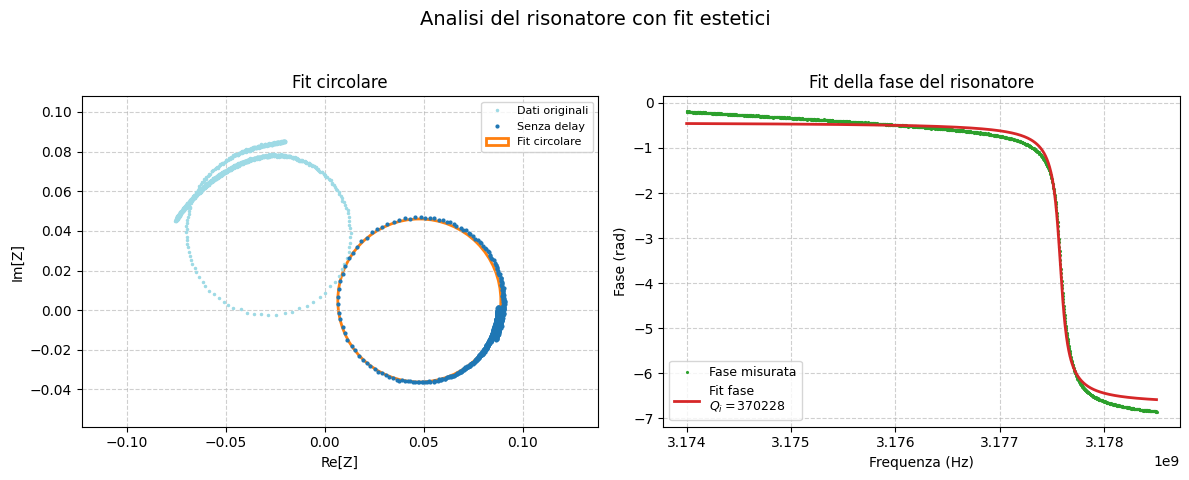

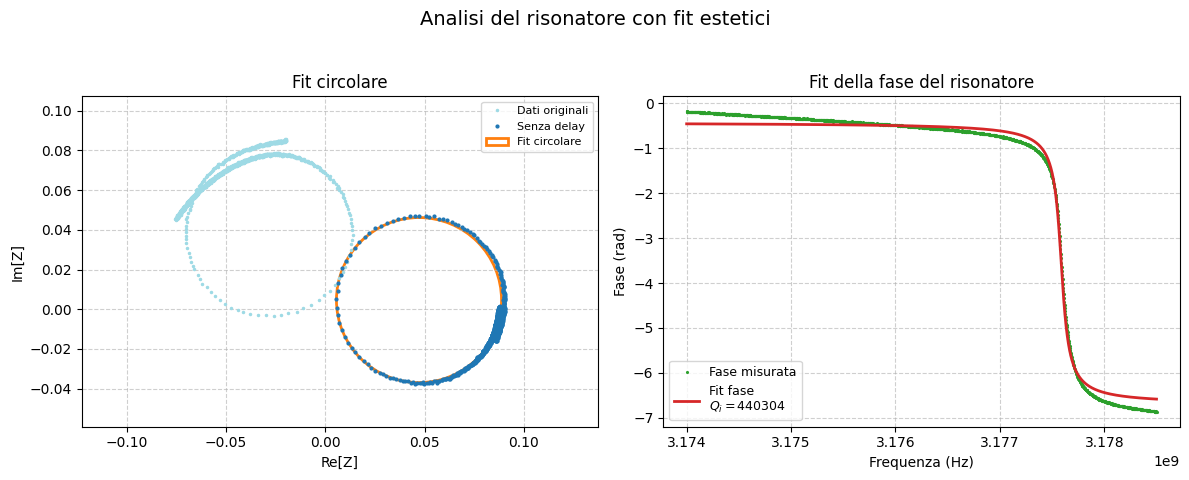

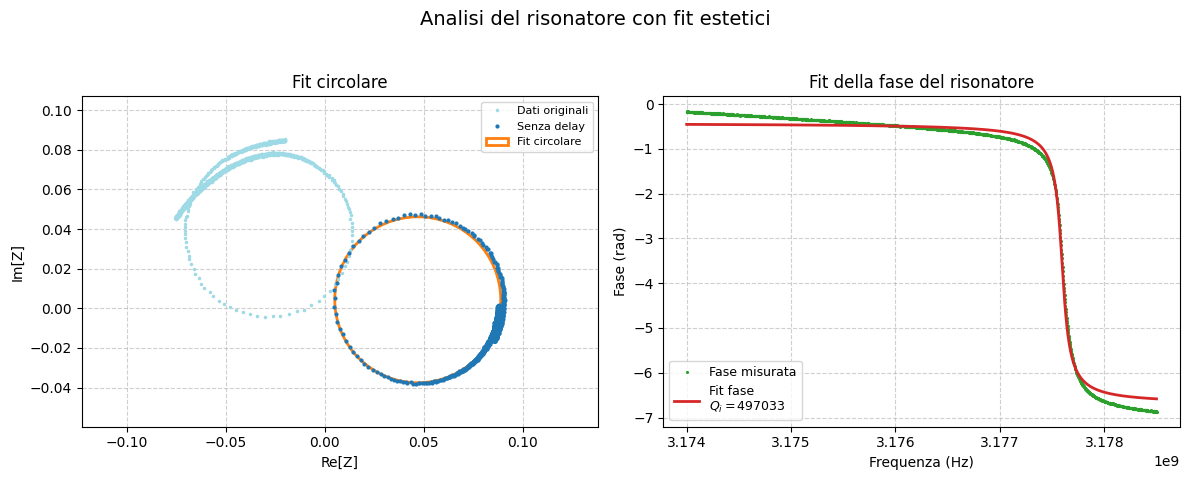

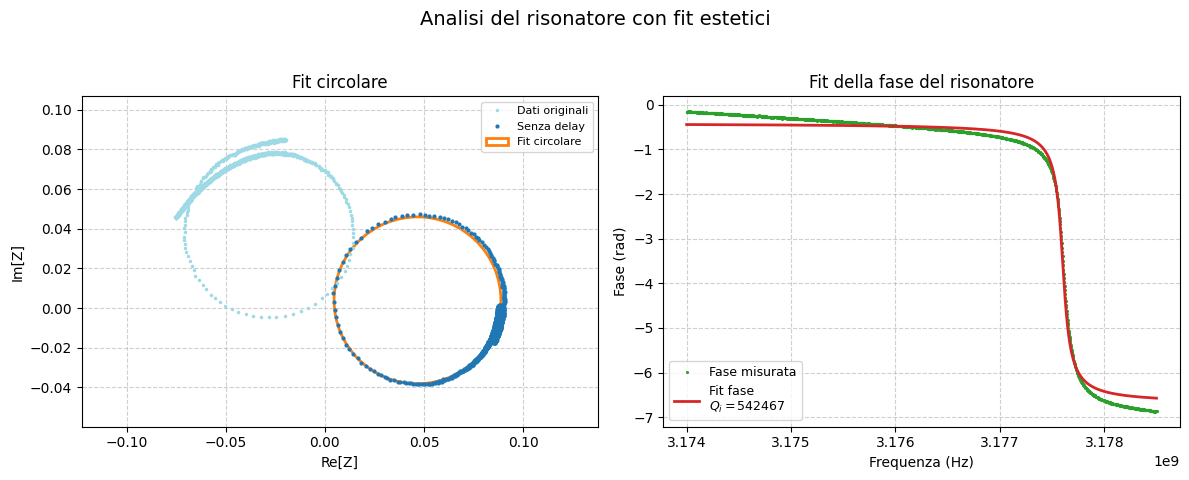

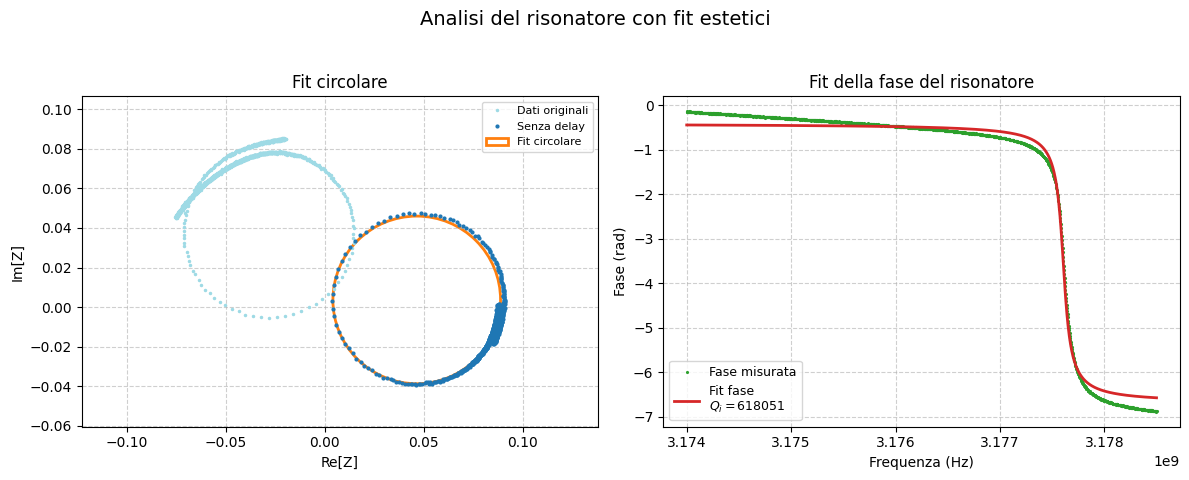

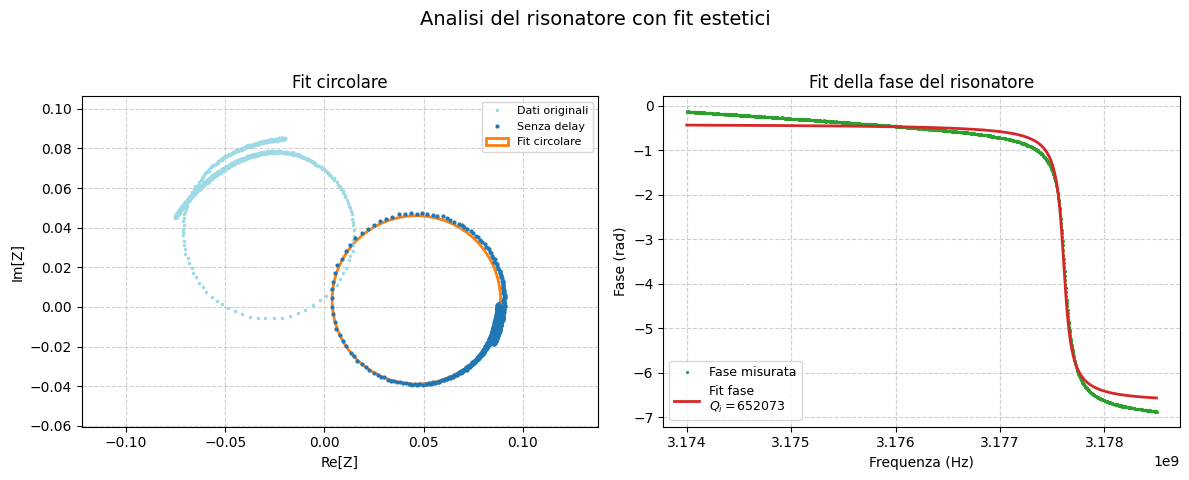

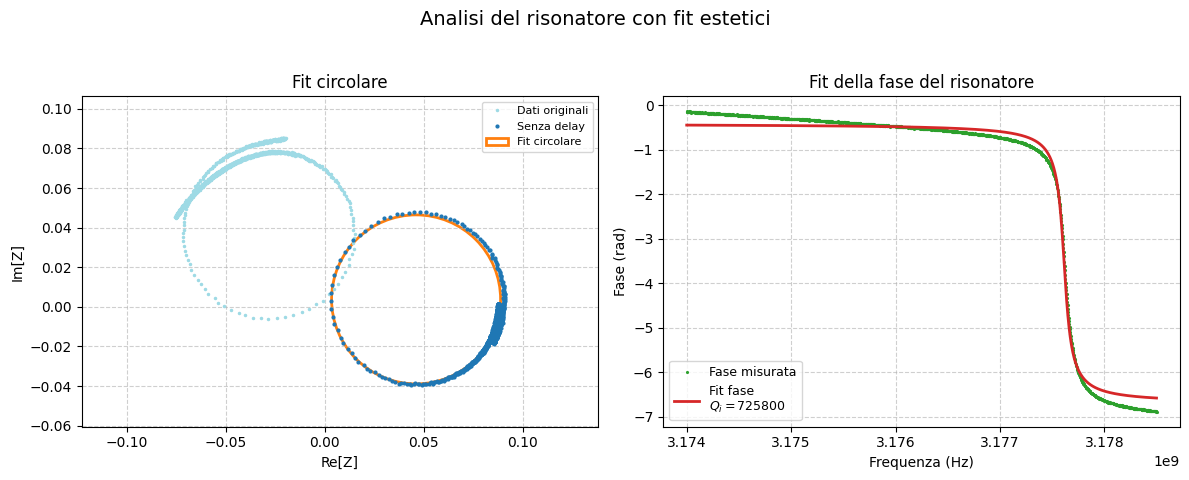

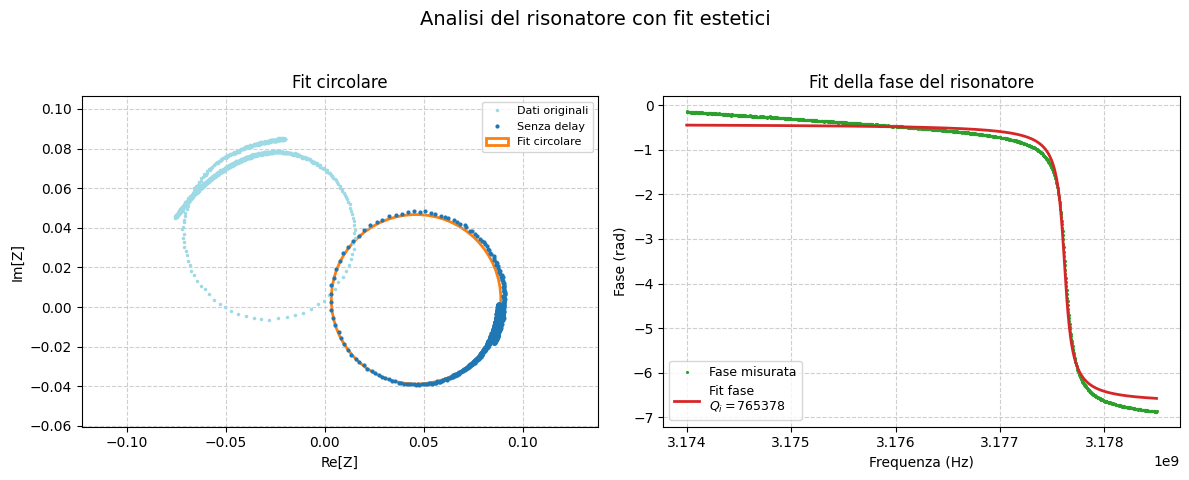

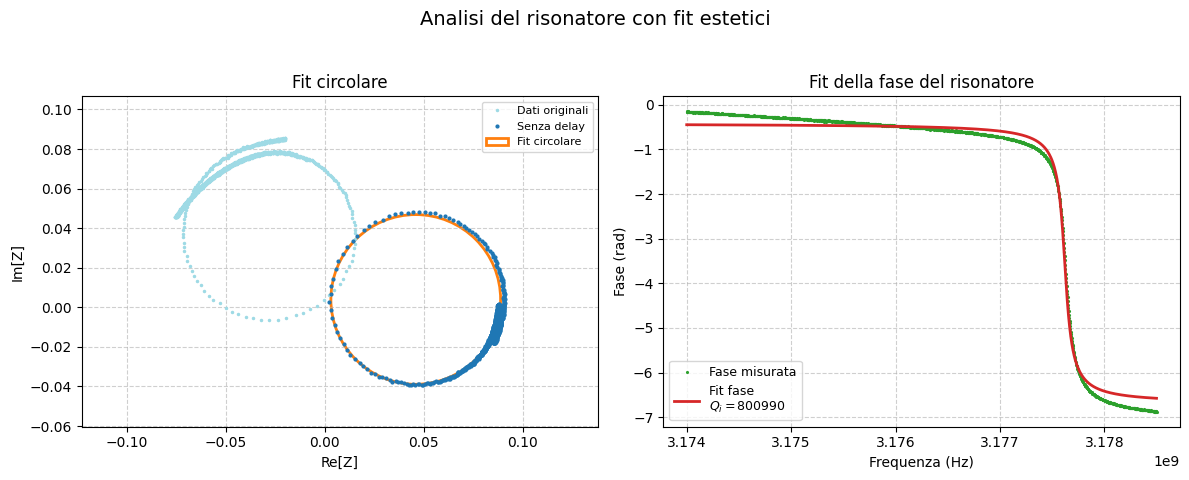

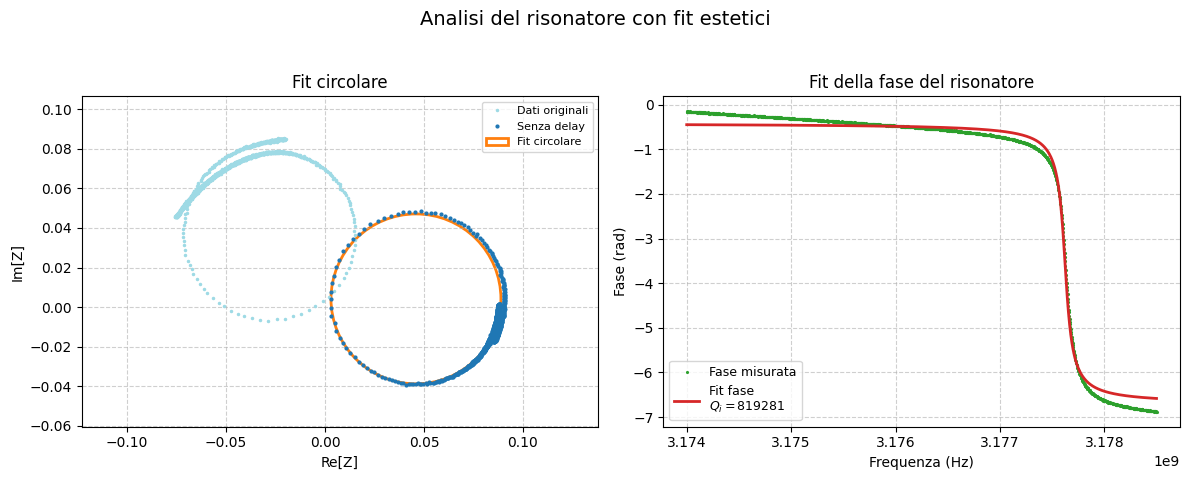

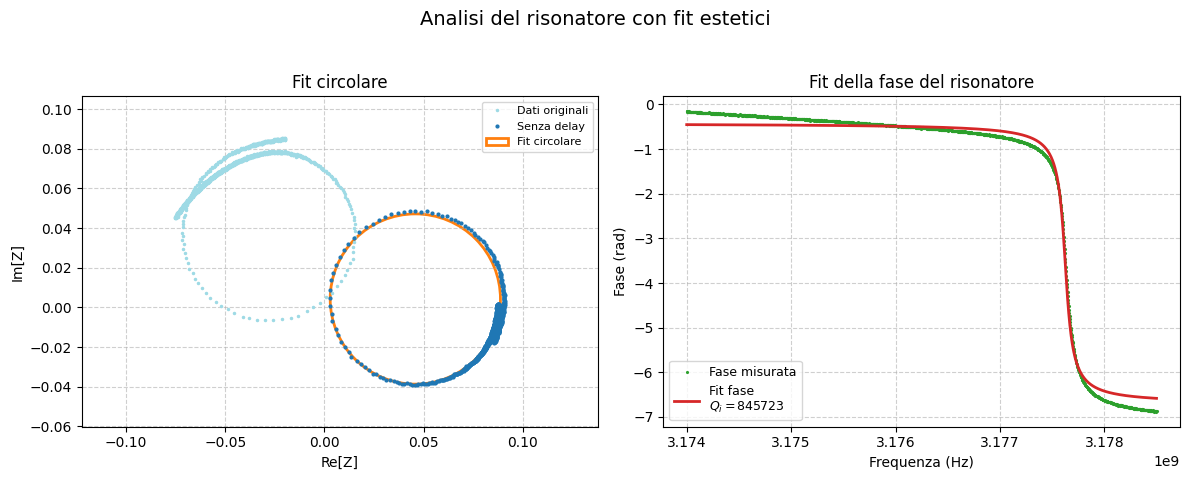

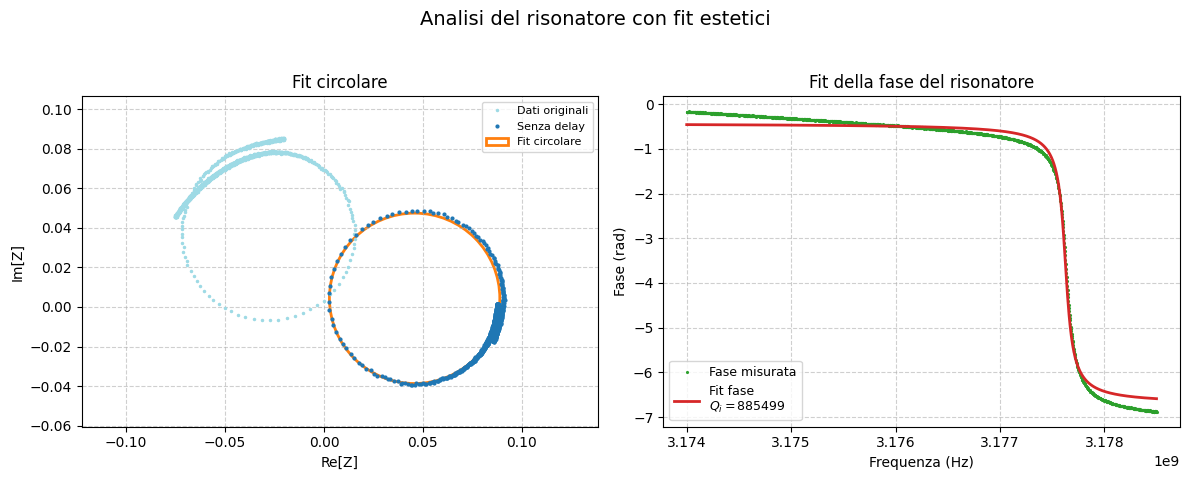

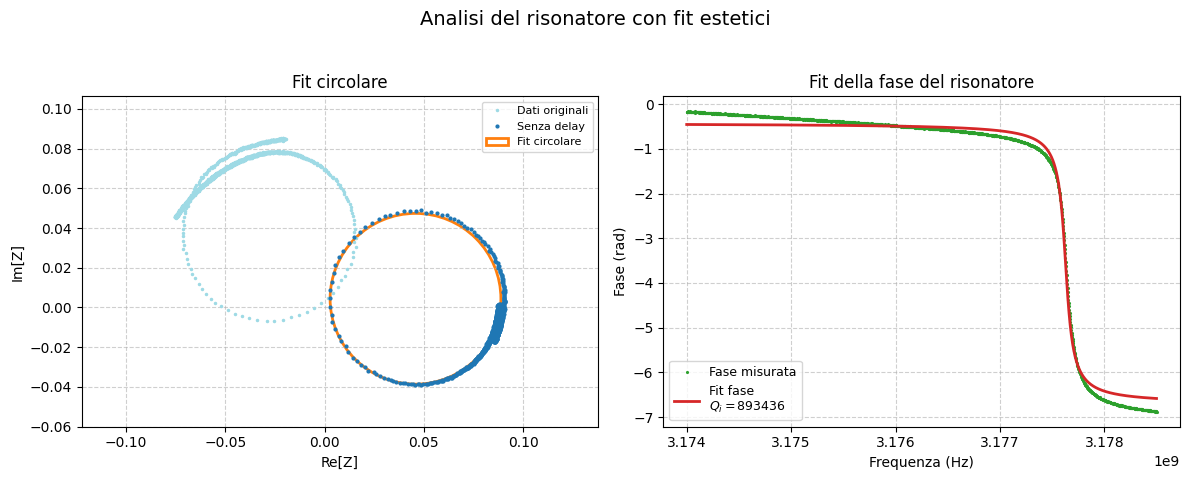

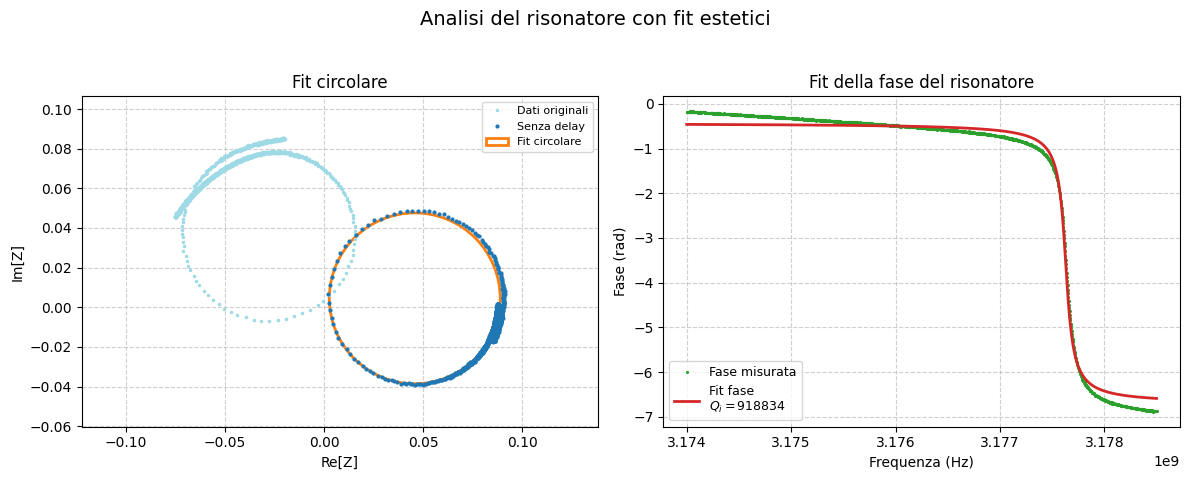

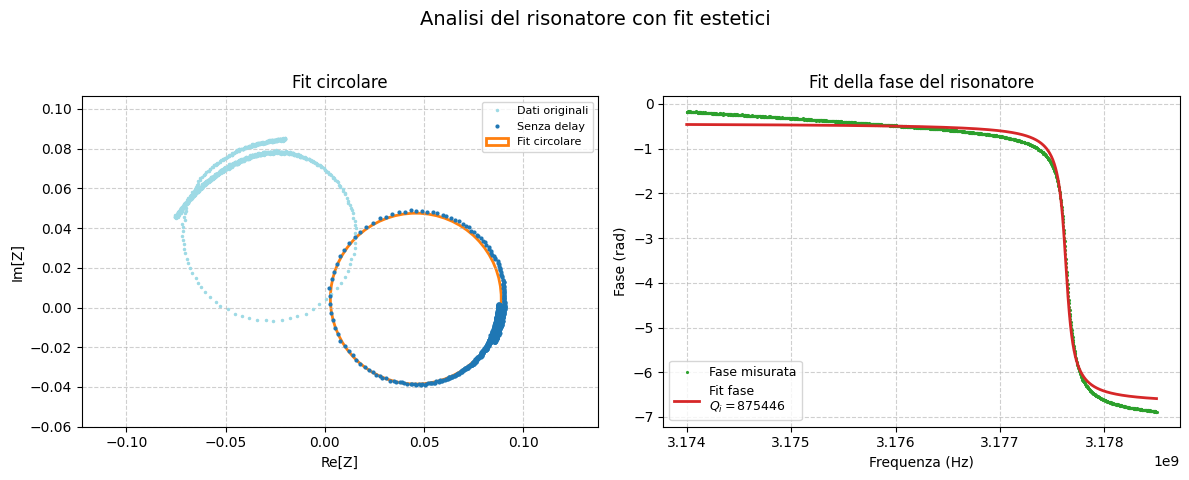

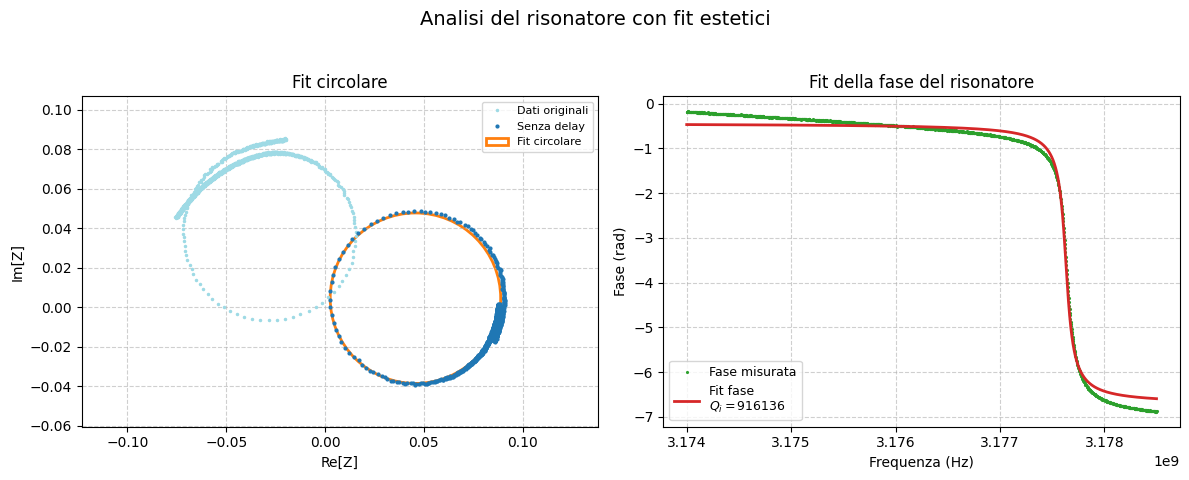

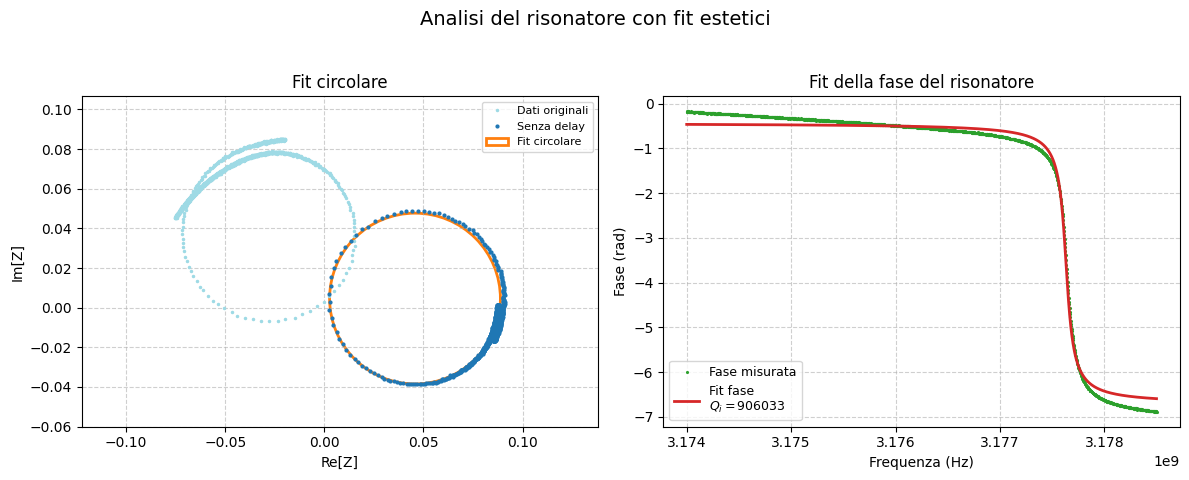

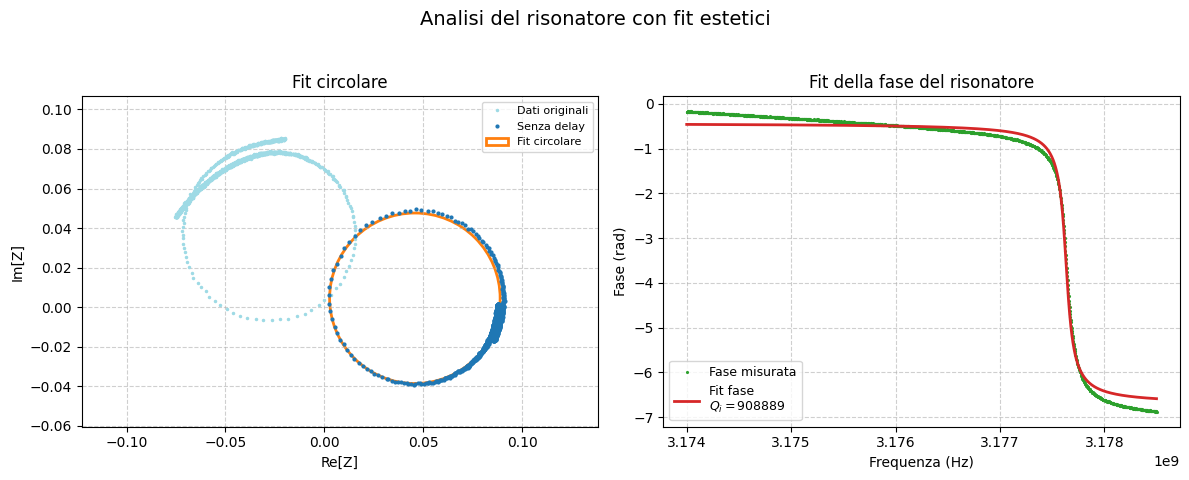

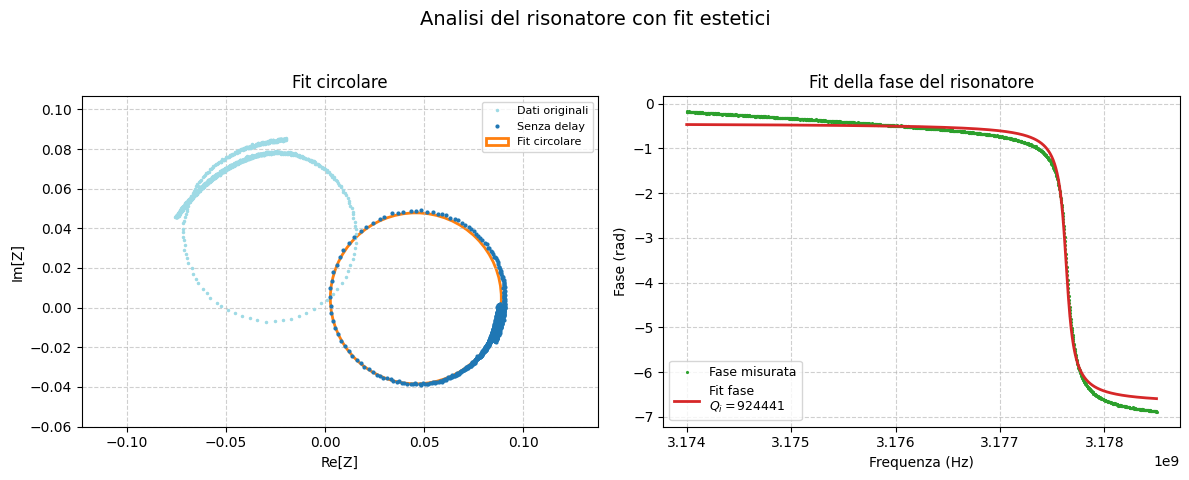

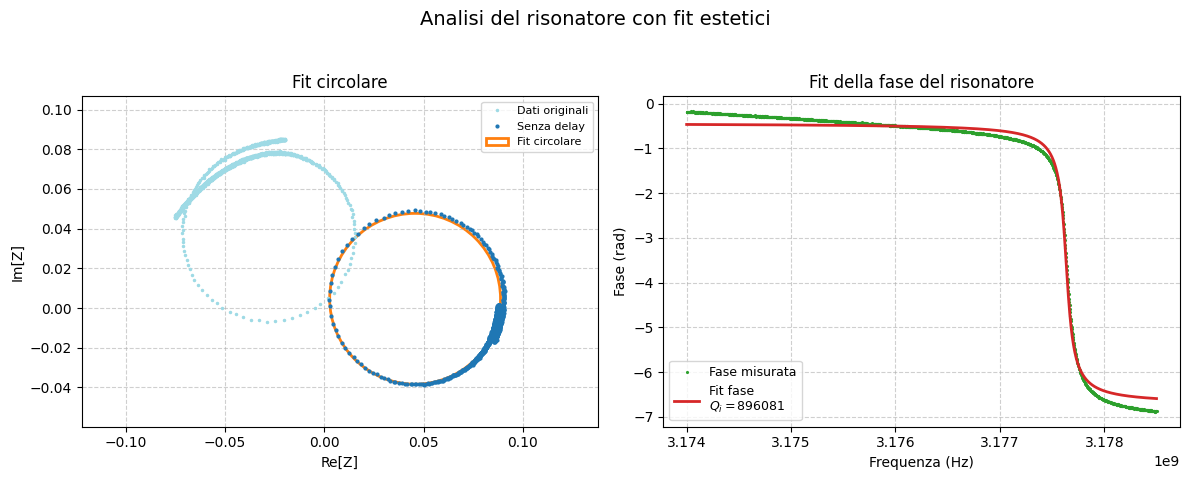

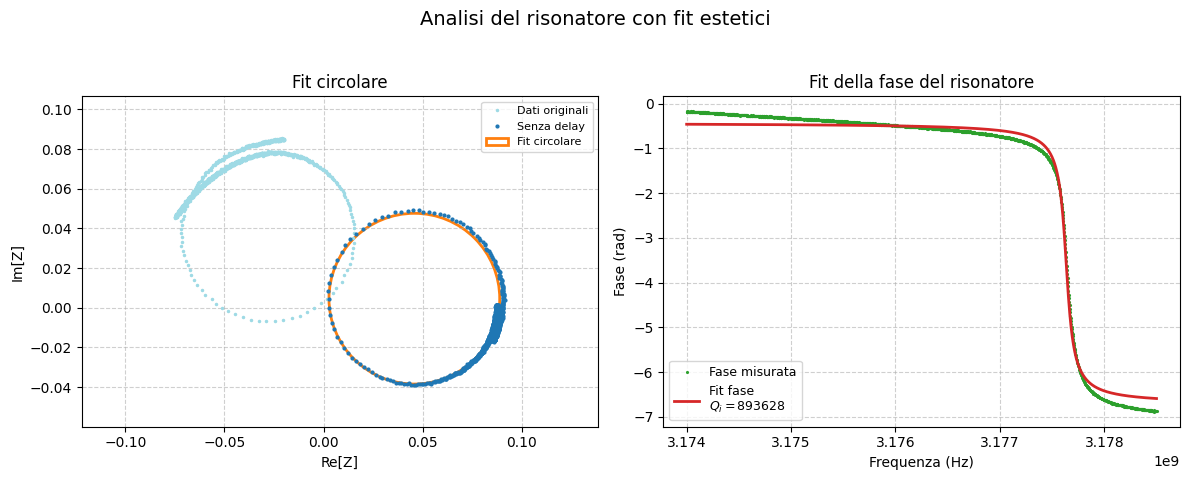

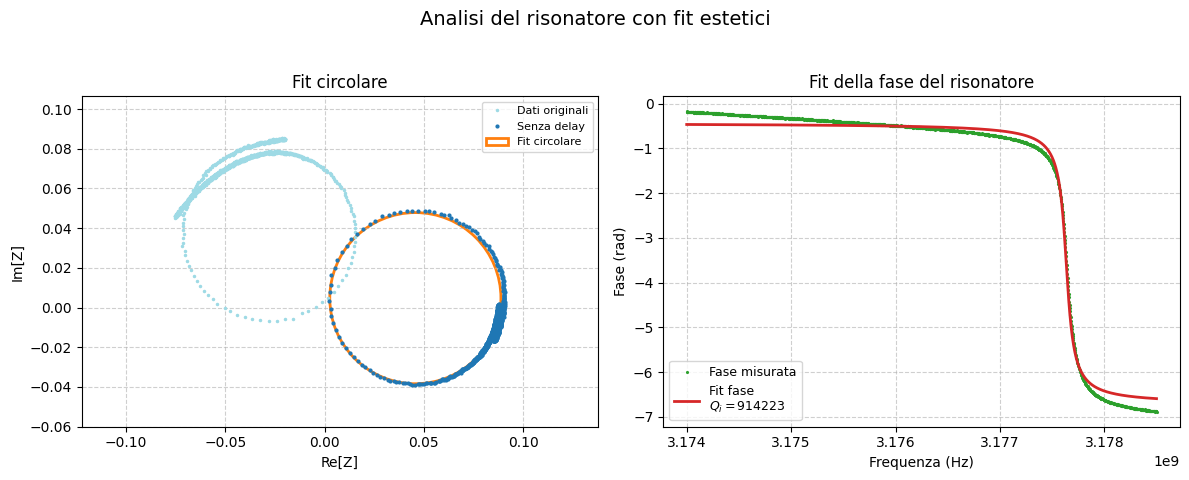

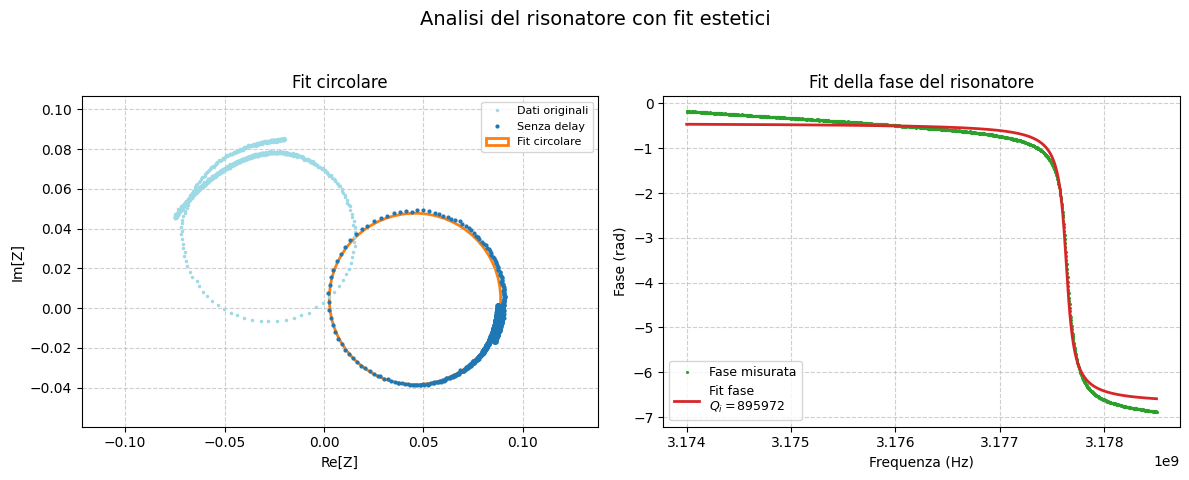

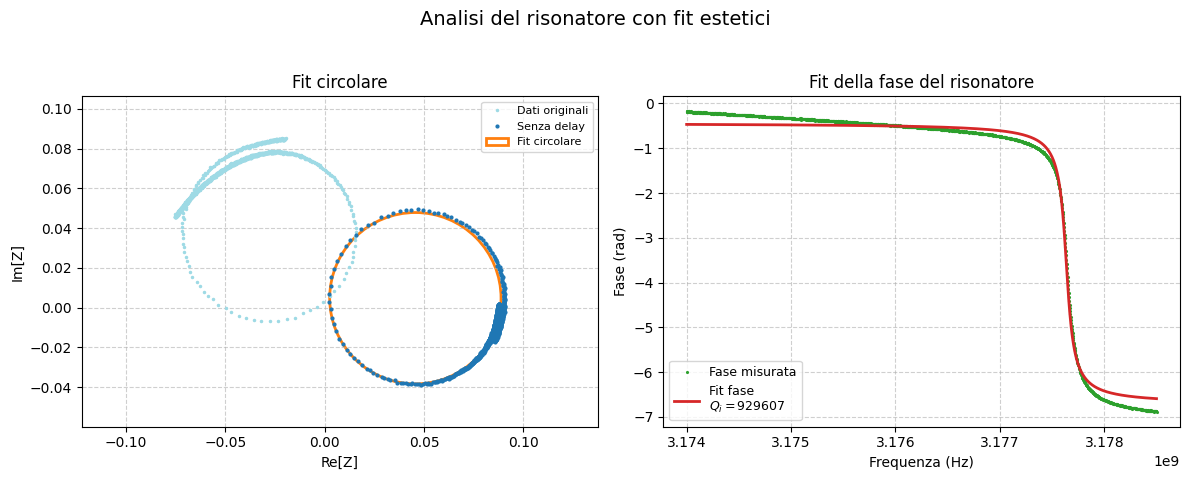

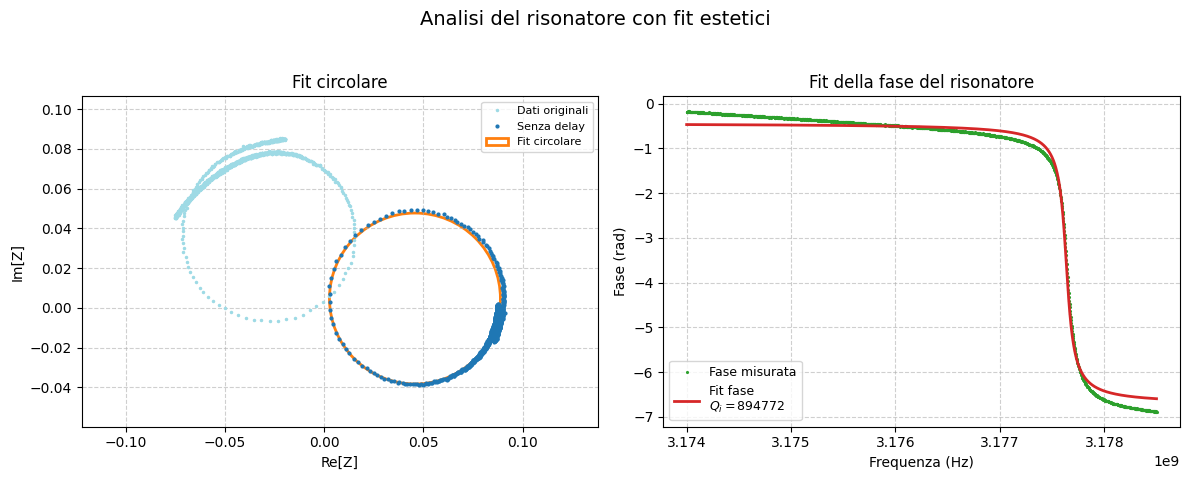

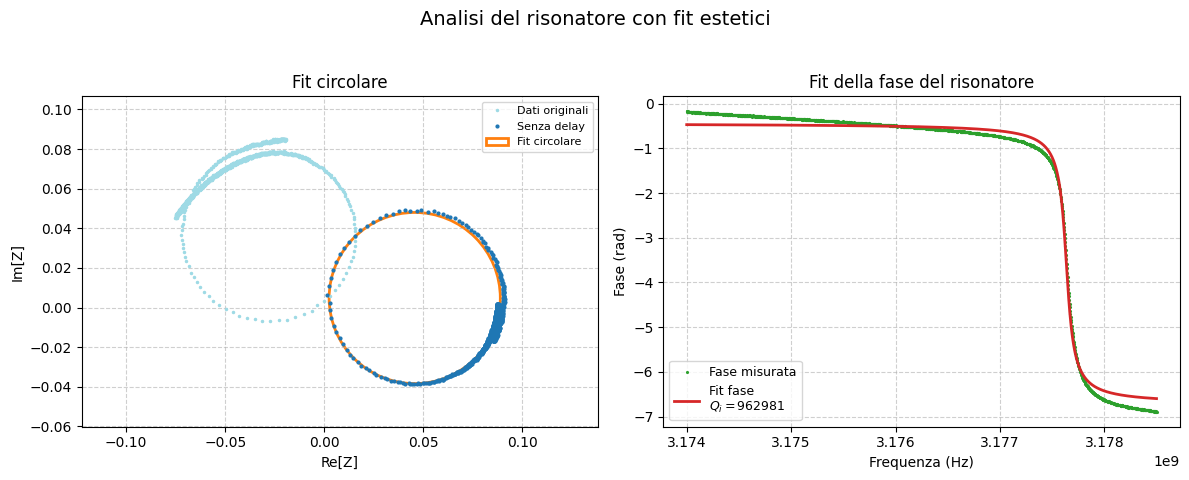

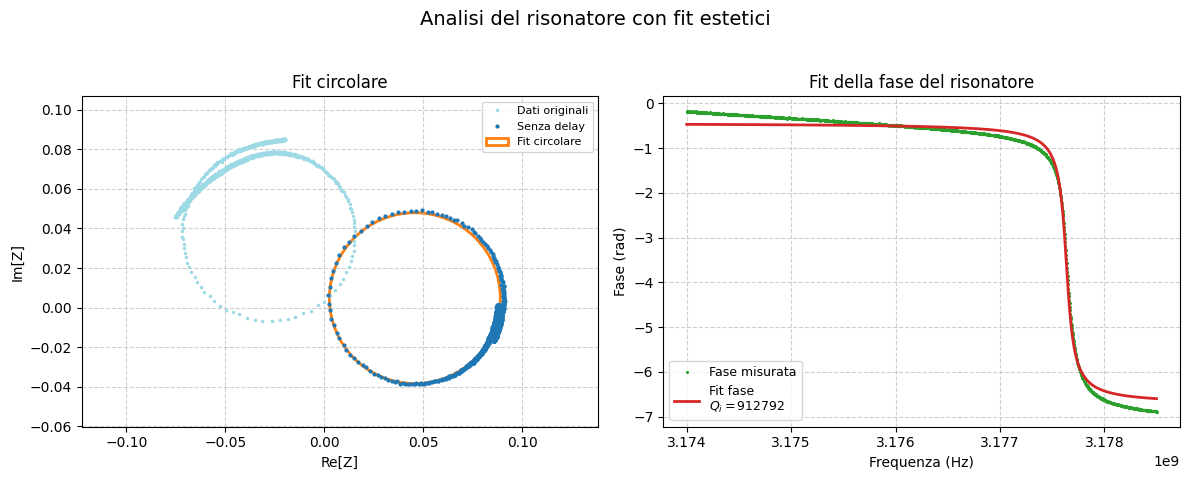

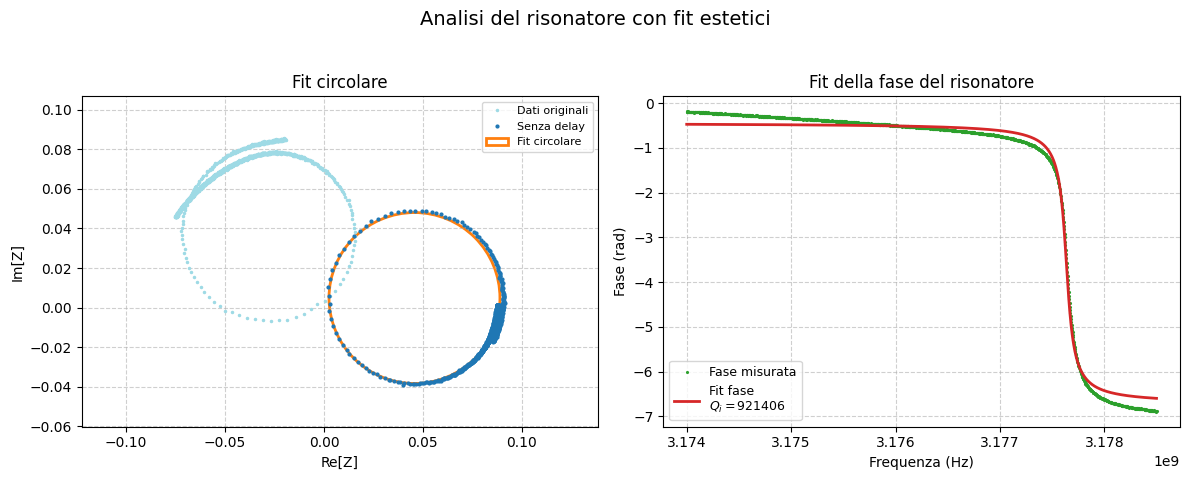

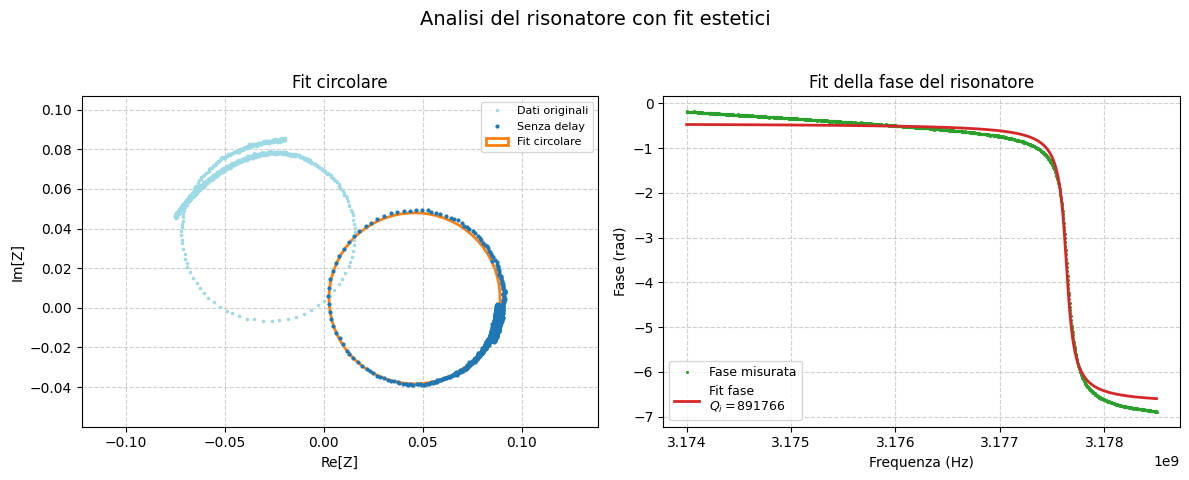

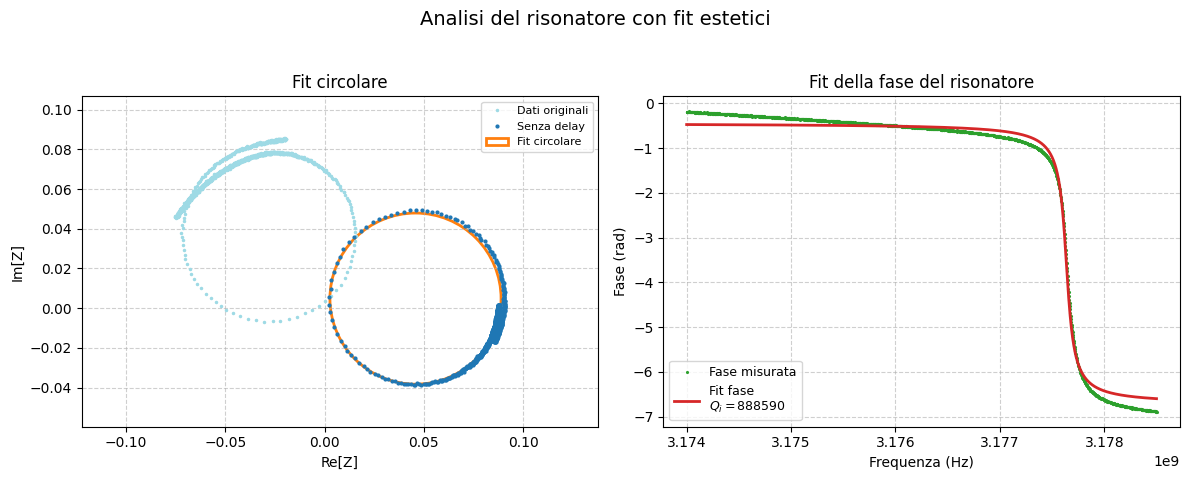

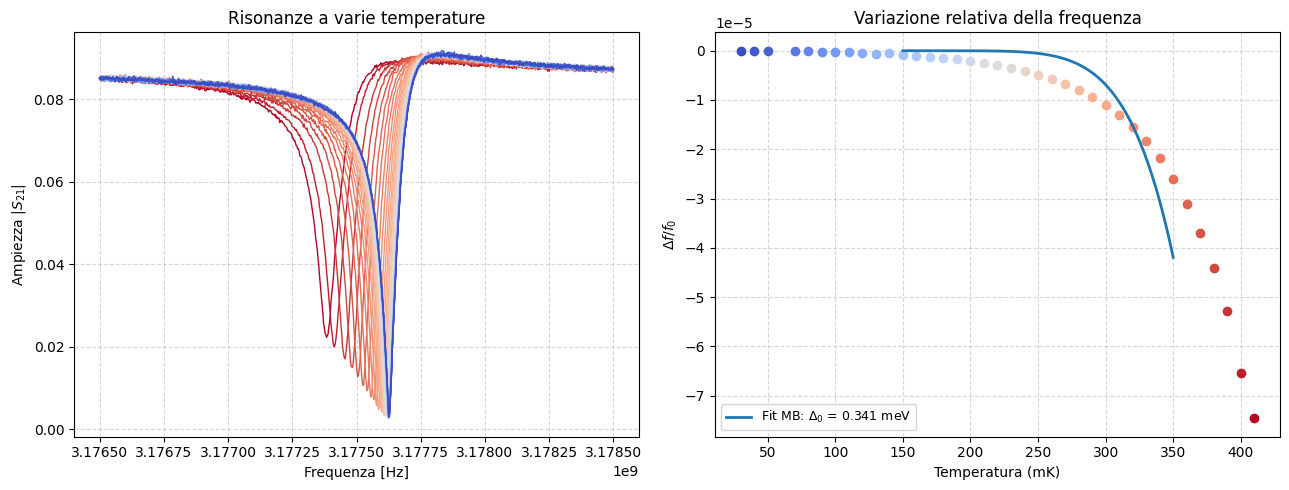

Fit completato:
  α = 0.8 (fissato)
  Δ₀ = 0.3406 meV


In [1]:
from temperature_dependance import fit_full_resonator
from temperature_dependance import plot_resonances

import numpy as np
import matplotlib.pyplot as plt

files = []
qc_list = []
qi_list = []
qt_list = []
fr_list = []

# Genera intervalli
p = np.arange(40, 118, 2)
Temp = np.arange(30, 420, 10)[::-1]  # Inverto qui direttamente

# Associa nomi file a temperature
files = [f"Q_res{i}" for i in p]

# Temperature da escludere
T_err = {60}

# Liste filtrate
T_cut = []
files_cut = []

# Loop su file e temperature
for elem, T in zip(files, Temp):
    if T not in T_err:
        T_cut.append(T)
        files_cut.append(elem)
        file_path = f"../../data/Delta/gap_run12/{elem}.txt"
        qc, qi, qt, fr = fit_full_resonator(file_path)
        fr_list.append(fr)

# Costruisci i percorsi SOLO per i file selezionati
file_paths = [f"../../data/Delta/gap_run12/{f}.txt" for f in files_cut]

# Plot finale
fr_array = np.array(fr_list)
plot_resonances(file_paths, T_cut, fr_array)
